30. Emplee la regla compuesta de Simpson con n=16 para aproximar el momento de inercia con respecto al origen, de una lámina en la forma de la región acotada por *y = ln(x)*, **x = 4*, eje *x*, empleando una integral doble. La densidad de la lámina varía conforme a la suma de los cuadrados de las distancias hacia los ejes coordenados. Además obtenga el valor exacto y determine el error. Emplee 15 decimales

### Solución

Planteo la integral:

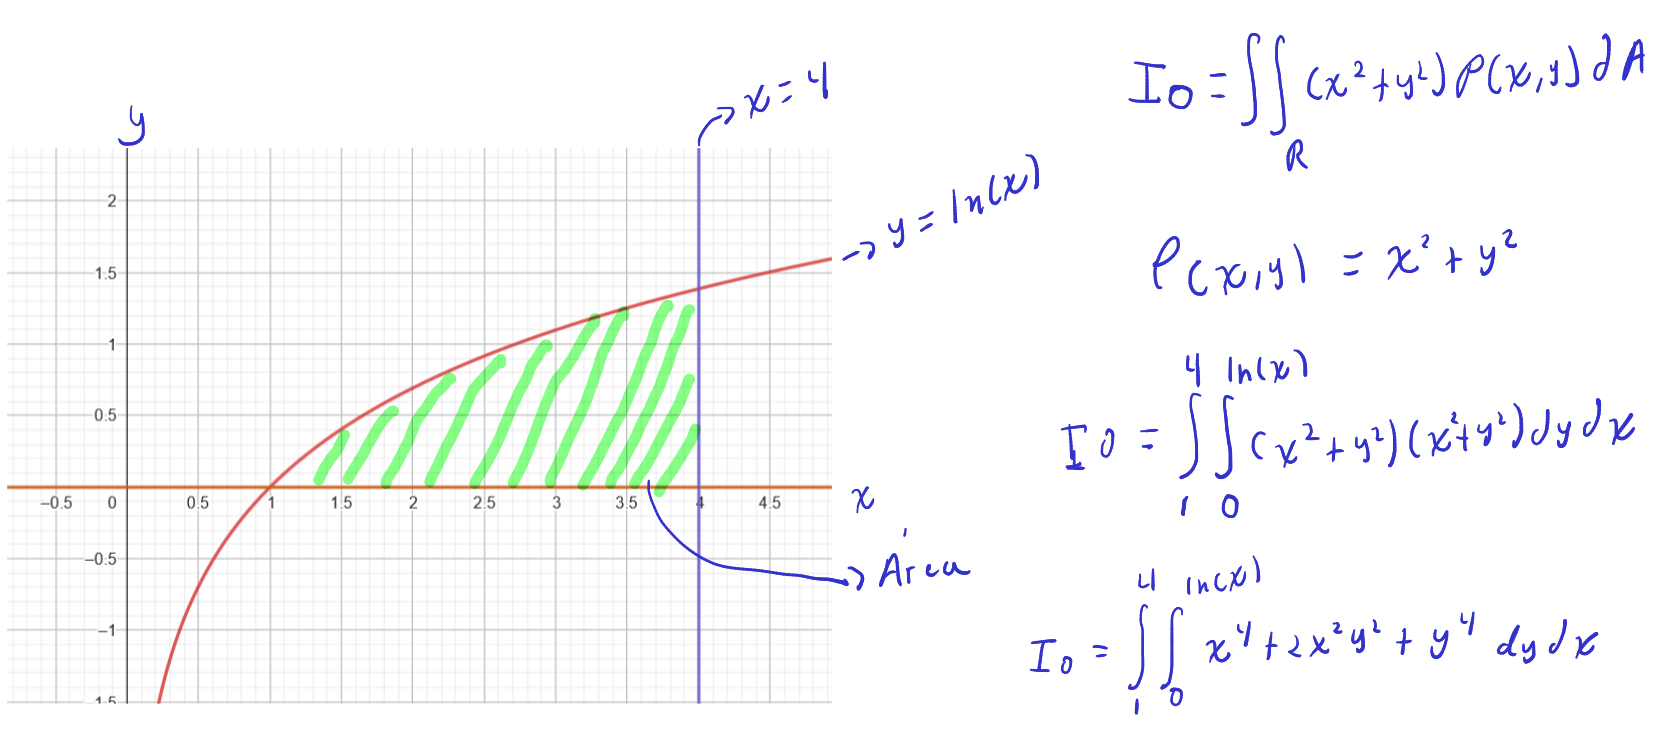

Ahora paso a solución con Python

In [2]:
# nos pide utilizar regla de simpson compuesta con n= 16

from sympy import *

# Declaro la dos variables simbólicas a utilizar
x = symbols("x")
y = symbols("y")


# Defino una función que resuelve la regla compuesta de simpson
# para la variable y
def regla_compuesta_del_simpson_y(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(x_0)
    suma_interna = f.subs(y, a)
    # Aquí hago las sumatorias desde f(x_1) hasta f(x_(n-1)) y hasta f(x_(n-2))
    # No es necesario el n-2 si n es par así que hago un solo for
    # Recordando que en Python los índices son iguales que en la fórmula
    for i in range(1, n):
        if i%2 == 0:
            suma_interna += 2 * f.subs(y, a + i*h)
        else:
            suma_interna += 4 * f.subs(y, a + i*h)
    # Sumo f(x_n)
    suma_interna += f.subs(y, b)
    return (h/3) * suma_interna

# Declaro mi función de dos variables
f = x**4 + 2 * x**2 * y**2 + y**4
a=0
b= ln(x)
n = 16

# resuelvo la integral interna
integral_interna = simplify(regla_compuesta_del_simpson_y(f=f, a=a, b=b, n=n))

# Ahora desarrollo la misma función para la variable x
def regla_compuesta_del_simpson(f, a, b, n):
    # Defino mi h dentro de la función
    h = (b-a) / n
    # La suma interna es el factor de la fórmula, la inicio con f(x_0)
    suma_interna = f.subs(x, a)
    # Aquí hago las sumatorias desde f(x_1) hasta f(x_(n-1)) y hasta f(x_(n-2))
    # No es necesario el n-2 si n es par así que hago un solo for
    # Recordando que en Python los índices son iguales que en la fórmula
    for i in range(1, n):
        if i%2 == 0:
            suma_interna += 2 * f.subs(x, a + i*h)
        else:
            suma_interna += 4 * f.subs(x, a + i*h)
    # Sumo f(x_n)
    suma_interna += f.subs(x, b)
    return (h/3) * suma_interna

c = 1
d = 4

valor_aproximado = round(
    float(
        regla_compuesta_del_simpson(
            f=integral_interna, a=c, b=d, n=n)), 15
)
print("El resultado aproximado es: ", valor_aproximado)

valor_exacto = round(float(integrate(integrate(f, (y,a,b)),(x,c,d))), 15)
print("El valor exacto es:", valor_exacto)

error = round(abs(valor_exacto-valor_aproximado), 15)
print("El error es:", error)

El resultado aproximado es:  264.3730020237517
El valor exacto es: 264.37152328554004
El error es: 0.001478738211688
